In [127]:
import warnings 
warnings.filterwarnings('ignore')
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Forge dataset

X.shaper: (26, 2)


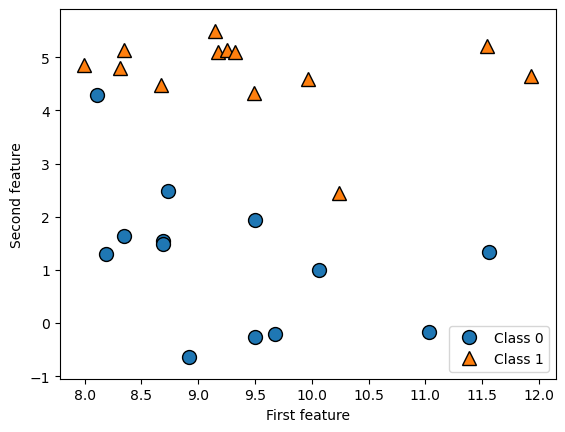

In [68]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shaper:', X.shape)

## Wave dataset

Text(0, 0.5, 'Target')

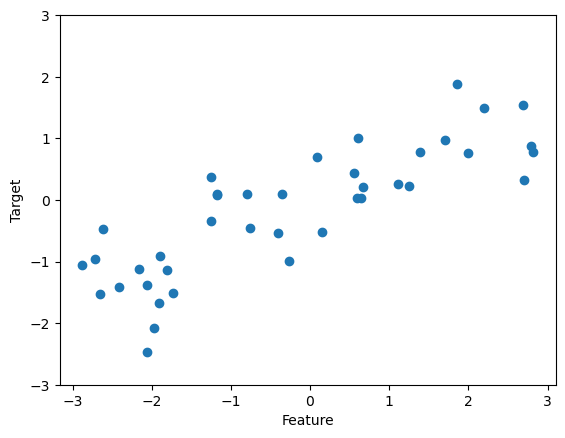

In [71]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

## Cancer datasets

In [74]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [76]:
df.shape

(569, 31)

In [78]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## Boston-Housing dataset

In [81]:
boston = load_boston()
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df['target'] = boston.target 
df.head()

NameError: name 'load_boston' is not defined

## k-NN usando scikit-learn

In [84]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set predictions:', clf.predict(X_test))
print('Test set accuracy:', clf.score(X_test, y_test))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.8571428571428571


## Modelos de regresión lineal

In [87]:
# Primer dataset: make_wave
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)


Coefficient: [0.44153666]
Intercept: -0.01711124414733381


In [89]:
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

Training set score: 0.6592061059587275
Test set score: 0.6932519118518163


In [91]:
# Segundo dataset: extended boston
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))


Training set score: 0.9520519609032729
Test set score: 0.6074721959665845


## Regresión de Ridge

In [94]:
## Ridge uses L2 regularization to avoid overfitting
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print('Training set score:', ridge.score(X_train, y_train))
print('Test set score:', ridge.score(X_test, y_test))

Training set score: 0.885796658517094
Test set score: 0.7527683481744754


In [96]:
# Ridge with a larger alpha (coefficients closer to 0)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score:', ridge10.score(X_train, y_train))
print('Test set score:', ridge10.score(X_test, y_test))

Training set score: 0.7882787115369615
Test set score: 0.6359411489177311


In [102]:
# Ridge with a smaller alpha (less constrained coefficients)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score:', ridge01.score(X_train, y_train))
print('Test set score:', ridge01.score(X_test, y_test))

Training set score: 0.9282273685001986
Test set score: 0.772206793647982


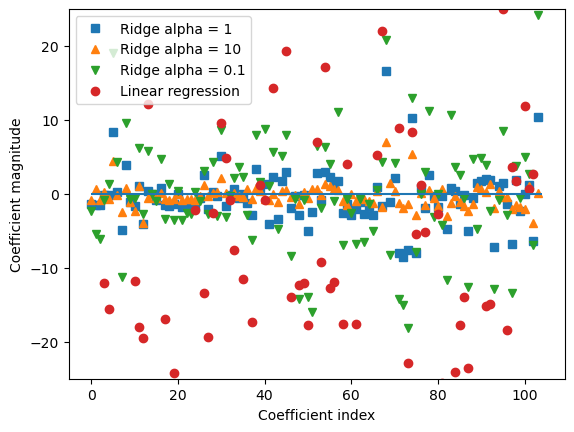

In [104]:
# Comparing coeff. magnitudes for different values of alpha
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')
plt.plot(lr.coef_, 'o', label='Linear regression') # alpha=0
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();

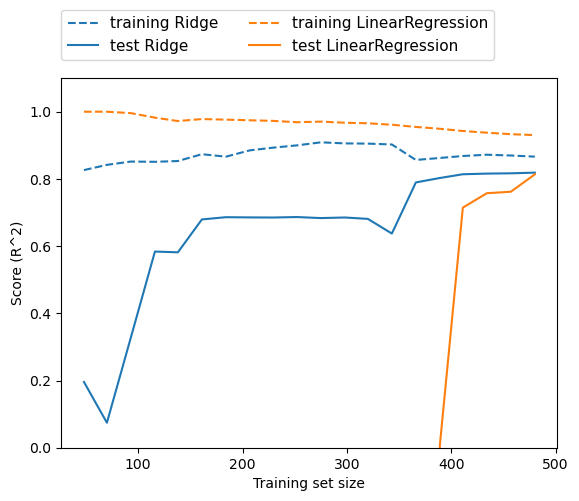

In [106]:
mglearn.plots.plot_ridge_n_samples()

## Regresión de Lasso

In [114]:
# Lasso uses L1 regularization to avoid overfitting
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)
print('Training set score:', lasso.score(X_train, y_train))
print('Test set score:', lasso.score(X_test, y_test))
print('Number of features used:', np.sum(lasso.coef_ != 0))

Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of features used: 4


In [116]:
# To reduce underfitting, let's decrease alpha and increase max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score:', lasso001.score(X_train, y_train))
print('Test set score:', lasso001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso001.coef_ != 0))

Training set score: 0.8962226511086497
Test set score: 0.7656571174549983
Number of features used: 33


In [118]:
# Setting alpha too low will remove regularization and lead to overfitting
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print('Training set score:', lasso00001.score(X_train, y_train))
print('Test set score:', lasso00001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso00001.coef_ != 0))

Training set score: 0.9515087977585445
Test set score: 0.6193582257352221
Number of features used: 103


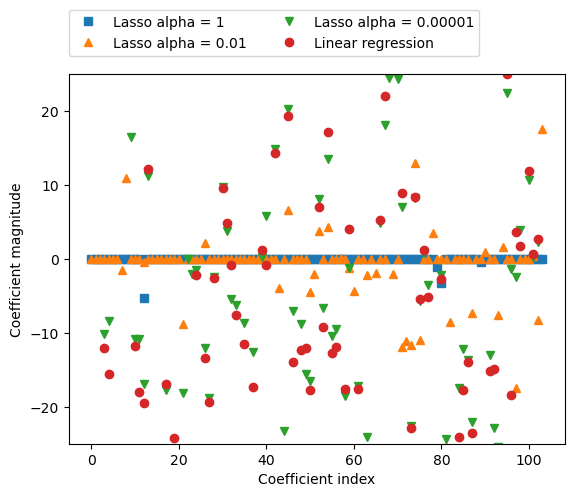

In [120]:
# Comparing coeff. magnitudes for different alpha values
plt.plot(lasso.coef_, 's', label='Lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha = 0.00001')
plt.plot(lr.coef_, 'o', label='Linear regression')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude');


## Regresión logística

In [129]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))

Training set score: 0.960093896713615
Test set score: 0.9440559440559441


In [131]:
# As C increases the model becomes less regularized (risk of overfitting)
logreg100 = LogisticRegression(C=100000).fit(X_train, y_train)
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))

Training set score: 0.9647887323943662
Test set score: 0.9300699300699301


In [133]:
# As C decreases the model becomes more regularized (risk of underfitting)
logreg001 = LogisticRegression(C=0.000001).fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))

Training set score: 0.9154929577464789
Test set score: 0.9020979020979021


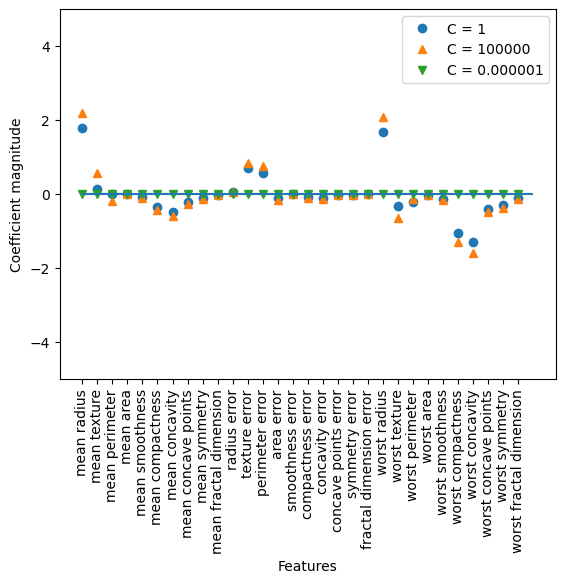

In [135]:
# coeff. learned by LogReg for different values of C
plt.plot(logreg.coef_.T, 'o', label='C = 1')
plt.plot(logreg100.coef_.T, '^', label='C = 100000')
plt.plot(logreg001.coef_.T, 'v', label='C = 0.000001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Features')
plt.ylabel('Coefficient magnitude')
plt.legend();